In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
%ls apartment_data/

'전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv'
'주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'


In [3]:
%ls ./

 01-apt-price-output_202003.ipynb
'0306_아파트 분양가격_part1-Copy1.ipynb'
'0306_아파트 분양가격_part1-Copy2.ipynb'
'0306_아파트 분양가격_part1.ipynb'
'1003_아파트분양 실습_part1-Copy1.ipynb'
'200228_아파트분양 실습_part2.ipynb'
'20200228_matplotlib_폰트_설정_3가지 방법.ipynb'
 apartment_data/
 apt_presale_price_강의자료.ipynb
 apt_presale_price_pandas_plot.ipynb
 matplotlib_font_setting.ipynb
 matplotlib_디폴트_한글폰트_테스트.ipynb
'pandas 시각화 튜토리얼.ipynb'
'공공데이터_아파트분양가 분석_part1-Copy1.ipynb'
'공공데이터_아파트분양가 분석_part2_0305~.ipynb'
'to_numeric astype apply sample.ipynb'
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled.ipynb


In [4]:
import pandas as pd

In [5]:
df_last = pd.read_csv("apartment_data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949")
df_last.shape

(4335, 5)

In [6]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
%ls apartment_data/

'전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv'
'주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'


In [8]:
df_first = pd.read_csv('apartment_data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', \
                 encoding='cp949')
df_first.shape

(17, 22)

In [9]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [10]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하기

In [11]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [12]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

True 는 1과 같고, false는 0과 같습니다. isnull() 메서드를 쓰면 null이냐 아니냐에 따라 true, false 값이 나타나고 이를 sum해주면 true값들만 칼럼을 기준으로 다 더하게 됩니다. 277개의 true값이 있음을 위 메서드를 통해 확인할 수 있습니다. 

In [13]:
# 위와 똑같은 결측치 갯수 체크
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [14]:
df_last["분양가격(㎡)"]

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4330    3882
4331     NaN
4332    3898
4333     NaN
4334    3601
Name: 분양가격(㎡), Length: 4335, dtype: object

공백 문자를 string으로 인식하기 때문에 이를 숫자타입으로 바꿀 수 없다는 뜻에서 valueerror가 발생했습니다. 

똑같은 에러 발생

In [15]:
pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격(㎡), Length: 4335, dtype: float64

In [16]:
type(pd.np.nan)

float

errors 의 옵션을 도움말 불러오기로 확인하면 coerce의 경우는 무시하고 공백값도 숫자타입으로 바꿔줍니다. 헌데 위에서는 float으로 됐습니다. nan값이 float타입이기 때문에 전체가 float형태로 바뀐 겁니다. 

In [17]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

df_first 데이터의 분양가격은 평당 분양가격입니다. df_last는 제곱미터당 분양가격입니다. 단위가 다르므로 이를 통일시켜줘야합니다. 

In [18]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


분양가격(m^2) 이 문자타입으로 이를 숫자타입으로 변경해주고 이를 단위를 맞추기 위해 3.3을 곱해서 평당분양가격 컬럼을 만들어줍니다. 

### 분양가격 요약하기

In [19]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [20]:
# 오브젝트 타입의 요약 
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

2221이라는 숫자가 17번 등장했다라는 의미 

In [21]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.
df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

갯수가 다른 이유는 문자타입일때는 공백을 카운트 했고, 숫자 타입일때는 공백이 nan으로 되기때문에 카운트가 되지 않는다. 그 차이로 인해 갯수가 달라진 것입니다.

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

'전용면적'이라는 어구가 모든 행에 거의 다 들어가기에 이를 칼럼으로 빼준다면 데이터의 용량을 줄이고, 램에 부하를 막을 수 있습니다. 

In [22]:
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

str.replace 를 써야 일부 어절만 찾아서 원하는 글자로 바꿀 수 있습니다.  
그냥 시리즈.replace() 하면 적용이 안됩니다. 전용면적 글자를 제거 못합니다.   
그냥 replace는 완전히 일치해야 바뀌기 떄문입니다.

In [23]:
df_last["전용면적"]= df_last["규모구분"].str.replace("전용면적","")
#df_last["규모구분"].str.replace("초과","~")
df_last["전용면적"]

0                  전체
1               60㎡이하
2         60㎡초과 85㎡이하
3        85㎡초과 102㎡이하
4              102㎡초과
            ...      
4330               전체
4331            60㎡이하
4332      60㎡초과 85㎡이하
4333     85㎡초과 102㎡이하
4334           102㎡초과
Name: 전용면적, Length: 4335, dtype: object

In [24]:
df_last["전용면적"]= df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"] 

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 필요없는 칼럼 삭제

In [25]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
전용면적       4335 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [26]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df_last = df_last.drop(["규모구분","분양가격(㎡)"],axis=1)
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [27]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
지역명       4335 non-null object
연도        4335 non-null int64
월         4335 non-null int64
분양가격      3957 non-null float64
평당분양가격    3957 non-null float64
전용면적      4335 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


memory usage 가 줄어든 것을 확인할 수 있습니다. 

### groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [28]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [29]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [30]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [31]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [32]:
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean()

전용면적   지역명
102㎡~  강원      8311.380000
       경기     14771.790000
       경남     10358.363265
       경북      9157.302000
       광주     11041.532432
                  ...     
전체     전남      7283.562000
       전북      7292.604000
       제주     10784.994000
       충남      7815.324000
       충북      7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [33]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


unstack을 하면 "지역명"인덱스가 컬럼으로 들어가게 된다. 

In [34]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [35]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g

연도    지역명
2015  강원      7188.060000
      경기     11060.940000
      경남      8459.220000
      경북      7464.160000
      광주      7916.700000
                 ...     
2019  전남      8219.275862
      전북      8532.260000
      제주     11828.469231
      충남      8748.840000
      충북      7970.875000
Name: 평당분양가격, Length: 85, dtype: float64

In [36]:
df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


In [37]:
df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().T

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


### pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [38]:
pd.pivot_table(df_last,index=["지역명"],values=["평당분양가격"],aggfunc="mean")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


연산의 결과가 groupby 의 경우 시리즈 데이터로 출력되는데, pivot table은 데이터프레임형태로 나오게 됩니다. 

In [39]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [40]:
pd.pivot_table(df_last, index="전용면적",values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [41]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [42]:
df_last.pivot_table(index=["전용면적","지역명"],values= "평당분양가격")

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [43]:
df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [44]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last,index=["연도","지역명"],values="평당분양가격")
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [45]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumMyeongjo')

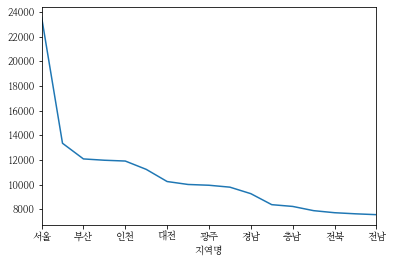

In [46]:
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

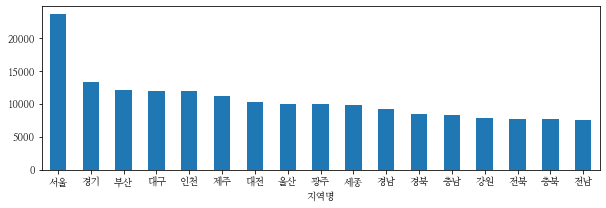

In [47]:
g.plot.bar(rot=0,figsize=(10,3))

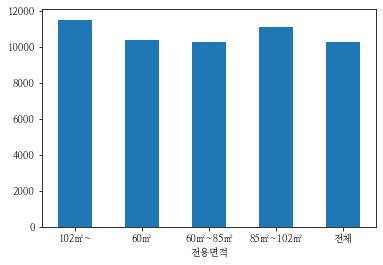

In [114]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar(rot=0)

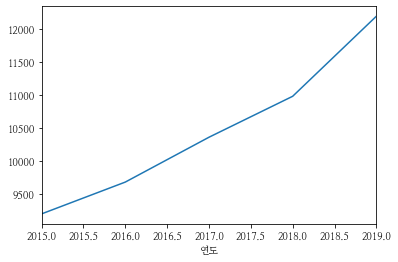

In [49]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [50]:
df_last.pivot_table(index="연도",values="평당분양가격")

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092


In [51]:
df_last.pivot_table(columns="연도",values="평당분양가격")

연도,2015,2016,2017,2018,2019
평당분양가격,9202.735802,9683.025,10360.487653,10978.938411,12188.293092


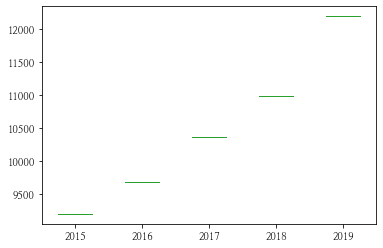

In [52]:
df_last.pivot_table(columns="연도",values="평당분양가격").plot.box()

In [53]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [54]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격")

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


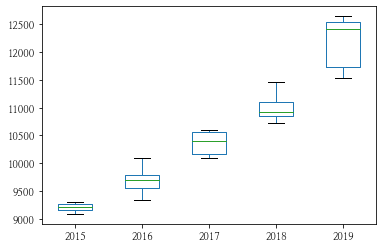

In [55]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격").plot.box()

In [56]:
df_last.pivot_table(index="전용면적",columns="연도",values="평당분양가격")

연도,2015,2016,2017,2018,2019
전용면적,,,,,
102㎡~,9837.226667,10388.728272,11334.484615,11445.574576,13331.520968
60㎡,8951.525000,9398.876119,10246.133333,10844.409783,11506.803371
60㎡~85㎡,8891.817647,9295.986765,9825.000000,10650.611823,11677.201531
85㎡~102㎡,9518.506250,10122.355435,10540.402454,11441.707895,12980.676923
전체,8893.047059,9293.042647,9901.270588,10675.825123,11602.715816


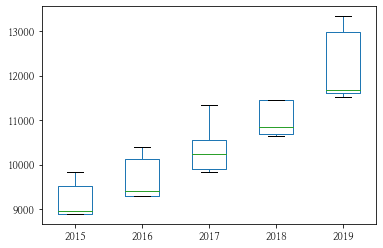

In [57]:
df_last.pivot_table(index="전용면적",columns="연도",values="평당분양가격").plot.box()

In [58]:
df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")

연도       2015                                                            2016  \
전용면적    102㎡~         60㎡      60㎡~85㎡    85㎡~102㎡           전체         102㎡~   
월                                                                               
1         NaN         NaN          NaN         NaN          NaN   9915.840000   
2         NaN         NaN          NaN         NaN          NaN   9861.060000   
3         NaN         NaN          NaN         NaN          NaN   9952.092857   
4         NaN         NaN          NaN         NaN          NaN  10282.181250   
5         NaN         NaN          NaN         NaN          NaN  10177.200000   
6         NaN         NaN          NaN         NaN          NaN  10181.118750   
7         NaN         NaN          NaN         NaN          NaN  10225.050000   
8         NaN         NaN          NaN         NaN          NaN  10355.193750   
9         NaN         NaN          NaN         NaN          NaN  10361.175000   
10    9631.82  8794.91250  8831.964706  9416.96250  8823.229412  10791.582353   
11    9932.78  8903.60625  8875.641176  9586.50000  8879.329412  11061.405882   
12    9947.08  9156.05625  8967.847059  9552.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적          60㎡      60㎡~85㎡      85㎡~102㎡           전체  ...         102㎡~   
월                                                          ...                 
1     9195.243750  9035.205882   9554.118750  9042.970588  ...  11220.220000   
2     9228.243750  9033.070588   9725.980000  9052.676471  ...  11243.100000   
3     9218.756250  9059.276471  10006.778571  9063.741176  ...  11320.320000   
4     9260.382353  9173.805882  10230.000000  9177.494118  ...  11125.840000   
5     9343.270588  9210.105882  10161.800000  9219.229412  ...  11536.800000   
6     9302.117647  9340.164706  10349.900000  9315.900000  ...  11101.907143   
7     9310.076471  9368.311765  10377.400000  9332.400000  ...  11079.750000   
8     9290.664706  9380.152941  10315.800000  9360.935294  ...  10994.185714   
9     9449.841176  9338.417647  10295.560000  9345.600000  ...  11529.540000   
10    9651.529412  9554.664706  10082.664706  9540.688235  ...  11827.860000   
11    9673.852941  9498.952941  10147.912500  9491.964706  ...  12028.940000   
12    9829.923529  9559.711765  10245.881250  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적          60㎡       60㎡~85㎡      85㎡~102㎡            전체        102㎡~   
월                                                                          
1     10839.40000  10160.505882  11286.000000  10362.776471  12322.64000   
2     10852.16000  10281.052941  11292.600000  10416.158824  12398.32000   
3     10970.74000  10430.717647  11505.600000  10568.347059  12491.38000   
4     11002.20000  10496.523529  11575.575000  10625.029412  12980.22000   
5     11027.98125  10641.141176  11727.100000  10741.888235  13371.80625   
6     11038.50000  10618.429412  11340.069231  10647.741176  13674.32000   
7     10628.20000  10617.264706  11624.376923  10579.217647  13533.91875   
8     10609.94000  10604.841176  11440.592308  10562.911765  13702.01250   
9     10539.54000  10813.905882  10983.814286  10749.652941  13854.01875   
10    10679.02000  10921.447059  11488.950000  10840.111765  13801.01250   
11    10827.91875  10986.476471  11495.078571  10904.364706  13873.40625   
12    11082.72000  11271.562500  11554.714286  11138.943750  13832.06000   

연도                                                            
전용면적           60㎡       60㎡~85㎡      85㎡~102㎡            전체  
월                                                             
1     11130.900000  11375.100000  11640.514286  11245.575000  
2     11190.520000  11394.075000  11667.150000  11262.900000  
3     11161.920000  11456.156250  11644.050000  11328.281250  
4     11243.807143  11505.037500  11777.464286  11391.187500  
5

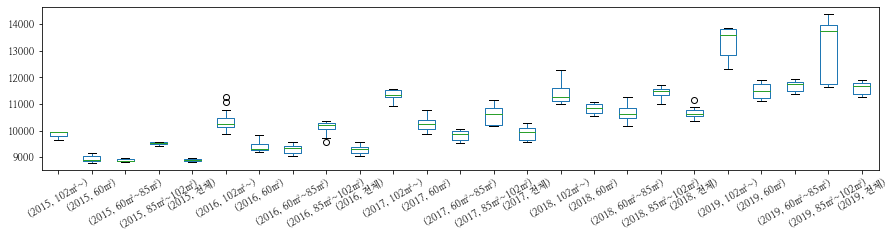

In [123]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15,3),rot=30)

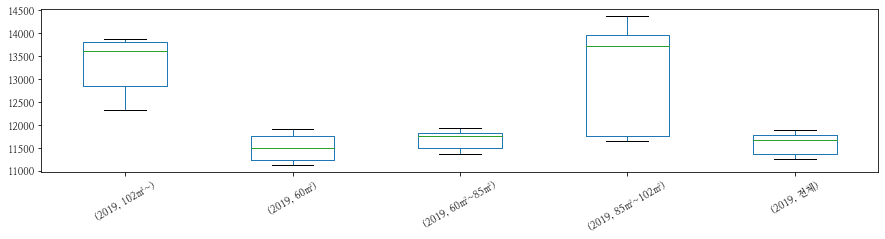

In [138]:
df_last2 = df_last[df_last["연도"]==2019]
p2 = df_last2.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p2.plot.box(figsize=(15,3),rot=30)

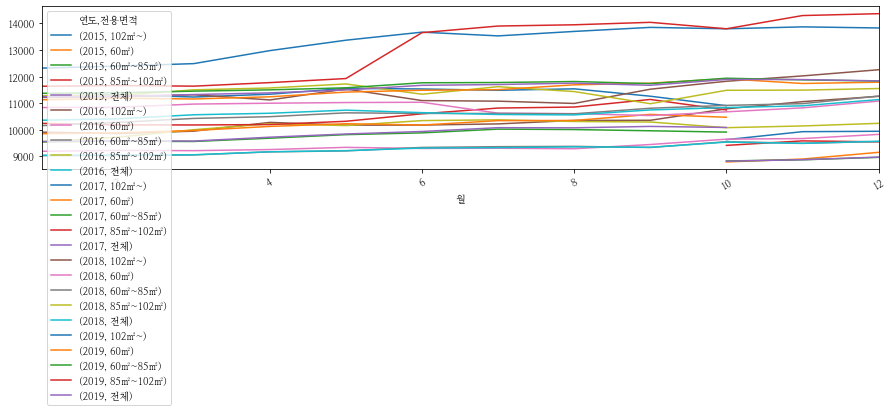

In [60]:
p.plot.line(figsize=(15,3),rot=30)

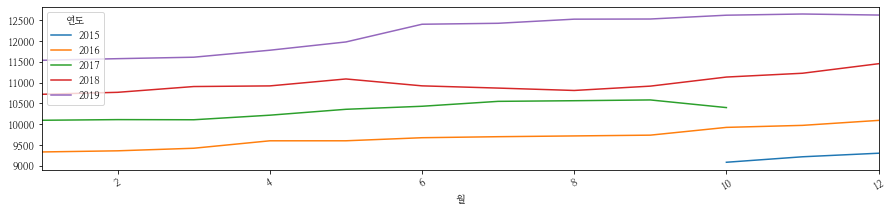

In [61]:
p = df_last.pivot_table(index="월", columns=["연도"], values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

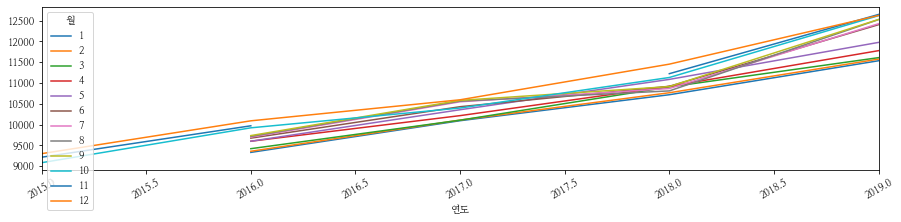

In [62]:
p = df_last.pivot_table(index="연도", columns=["월"], values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

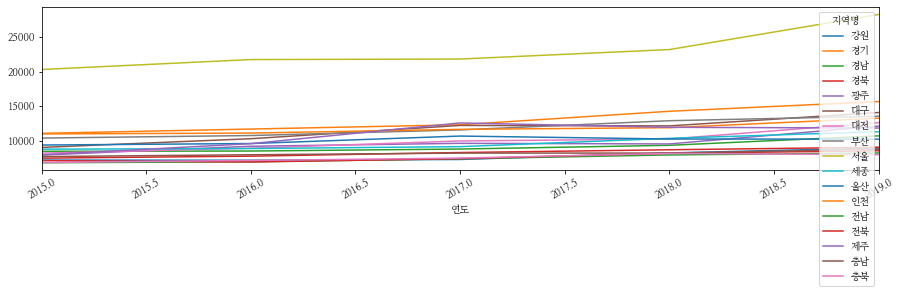

In [63]:
p = df_last.pivot_table(index="연도", columns=["지역명"], values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

In [64]:
import seaborn as sns

%matplotlib inline

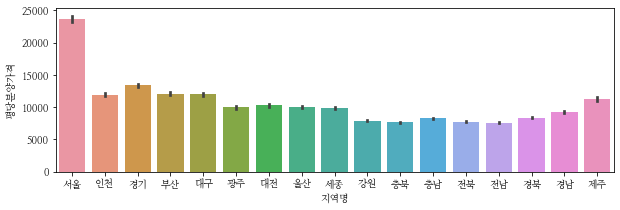

In [65]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명",y="평당분양가격")

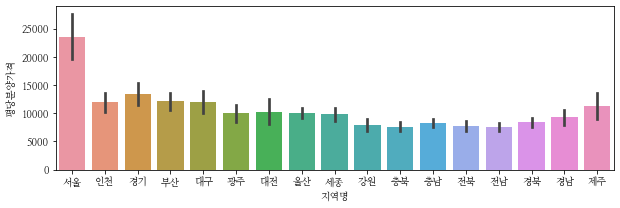

In [66]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명",y="평당분양가격",ci="sd")

ci="sd"는 관측값의 표준편차를 그려줌. 편차 큰 곳이 막대가 큰 것을 확인가능

confidence intervals - 막대 위 검은색 막대   
신뢰구간 95퍼를 의미합니다. 이상치 값을 제거한 95퍼센트 값을 샘플링했을때의 평균  

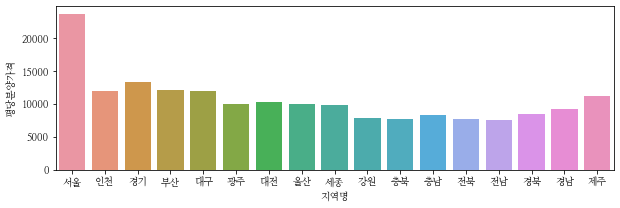

In [67]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명",y="평당분양가격",ci=None)

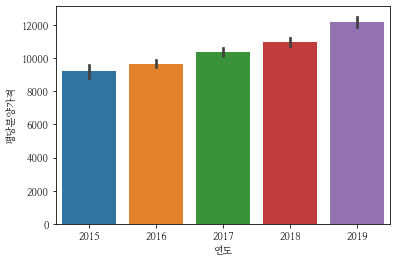

In [69]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last, x="연도", y="평당분양가격")

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

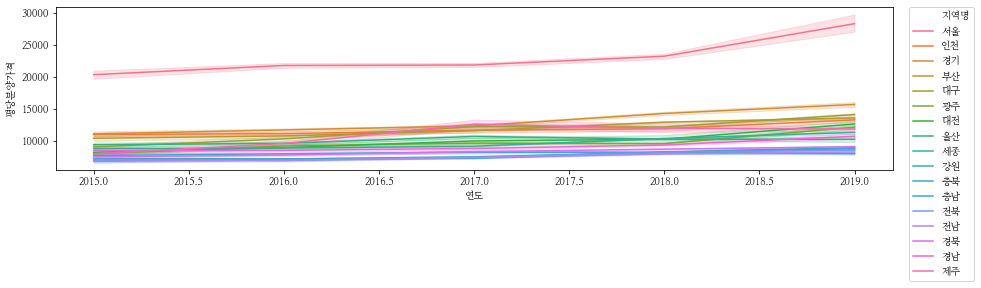

In [70]:
plt.figure(figsize=(15,3))
sns.lineplot(data=df_last, x="연도", y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

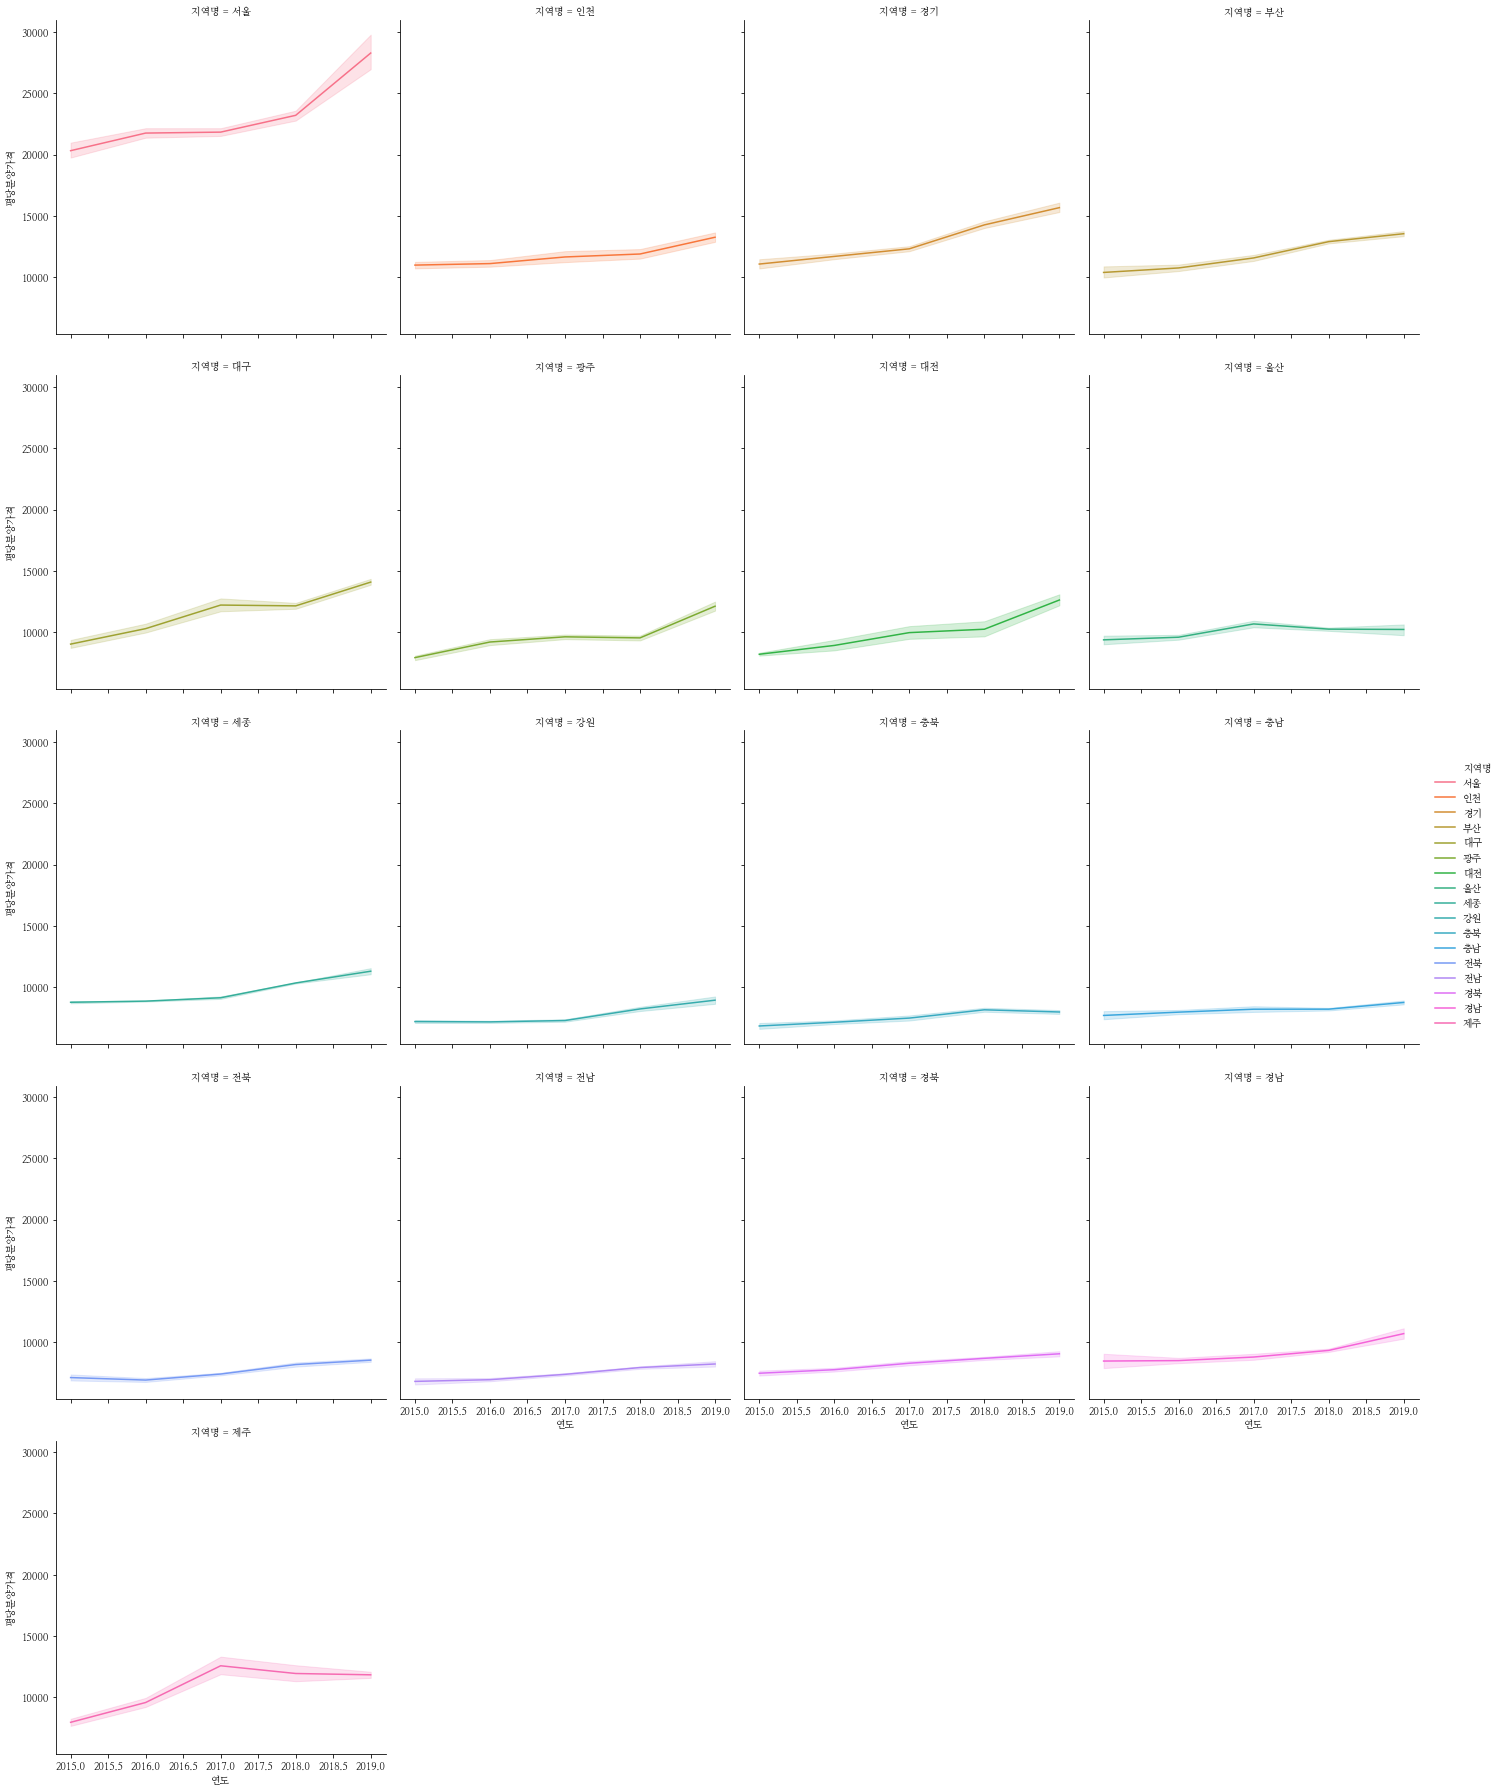

In [71]:
sns.relplot(data=df_last, x="연도",y="평당분양가격", 
            hue="지역명",kind="line", col="지역명",col_wrap=4)

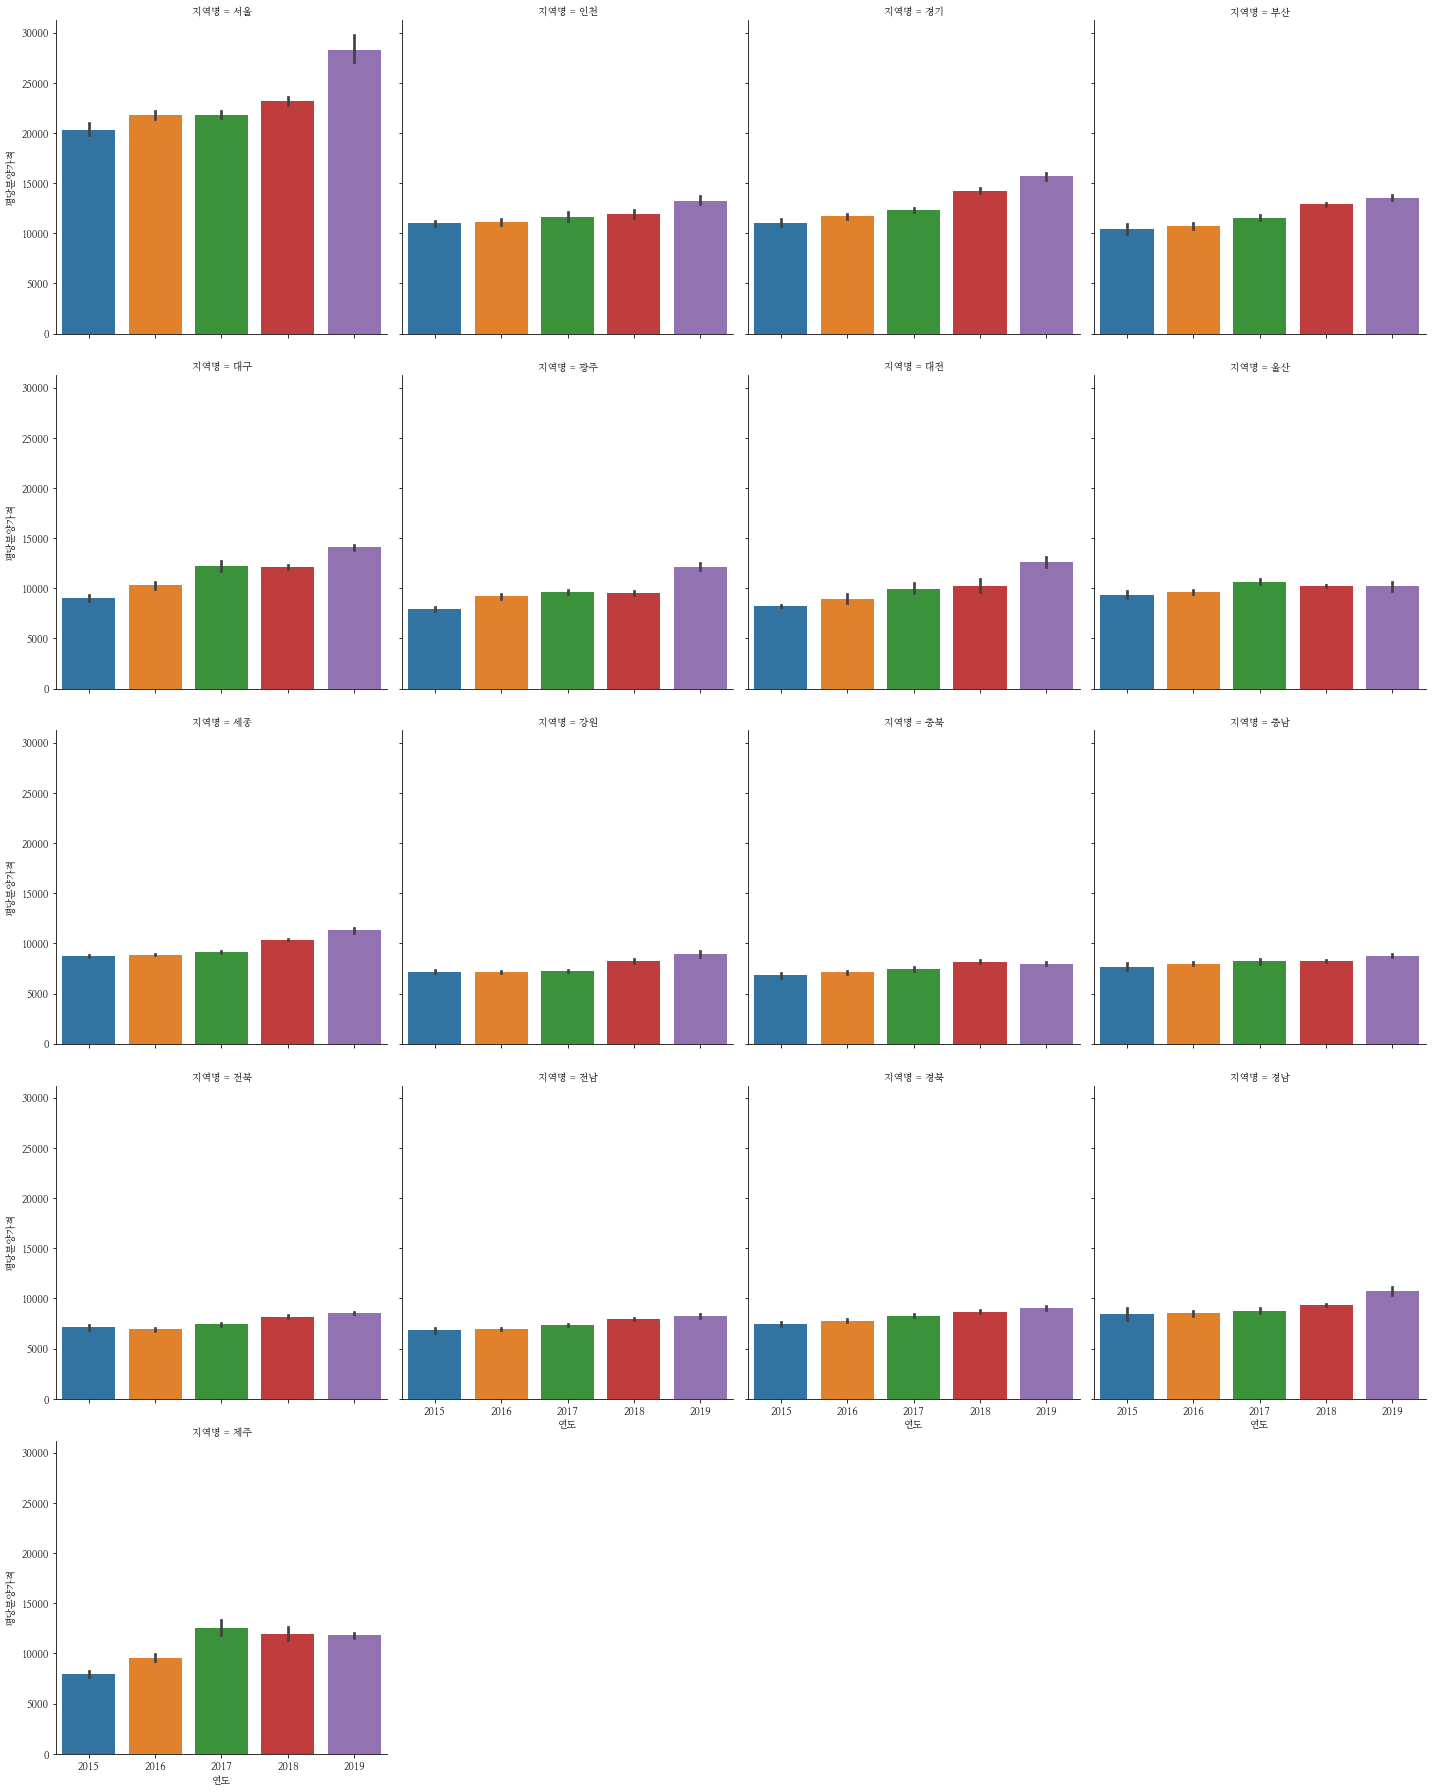

In [72]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

### boxplot과 violinplot

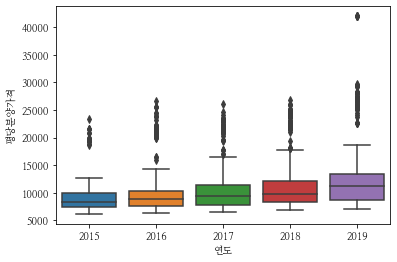

In [73]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(data=df_last,x="연도",y="평당분양가격")

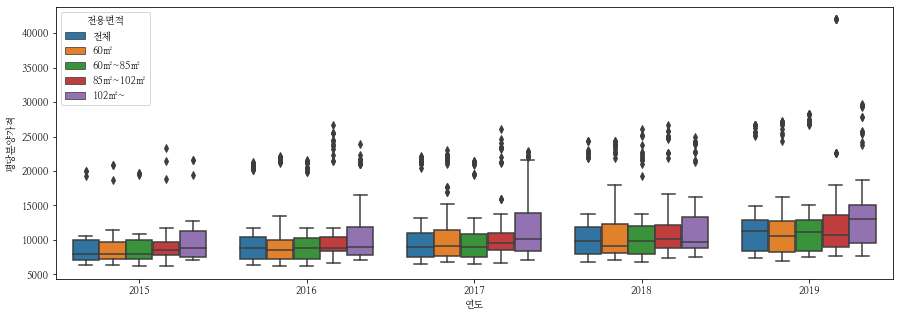

In [74]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_last,x="연도",y="평당분양가격",hue="전용면적")

boxplot 의 단점 - 로우데이터의 변화를 캐치 못하는 것을 보완해서 나온 게   
바이올린플롯 입니다. 아래 링크 참고  
https://autodeskresearch.com/publications/samestats

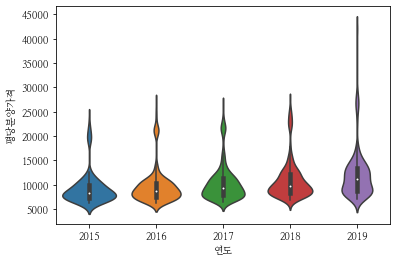

In [75]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

### lmplot과 swarmplot 

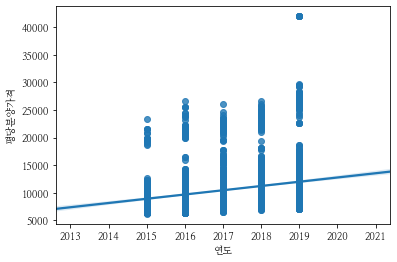

In [76]:
sns.regplot(data=df_last,x="연도",y="평당분양가격" )

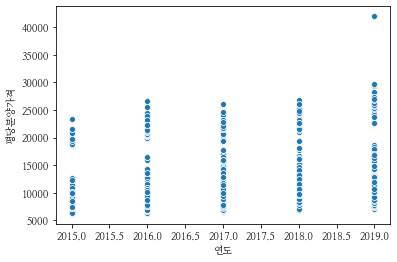

In [77]:
sns.scatterplot(data=df_last,x="연도",y="평당분양가격" )

regplot 은 scatterplot에 회귀선을 그어주는 그래프입니다. 

연도에 따라서 회귀선이 다르게 그려질 수 있습니다. 회귀선도 어떤 데이터냐에 따라 상관관계가 달라질 수 있습니다. 

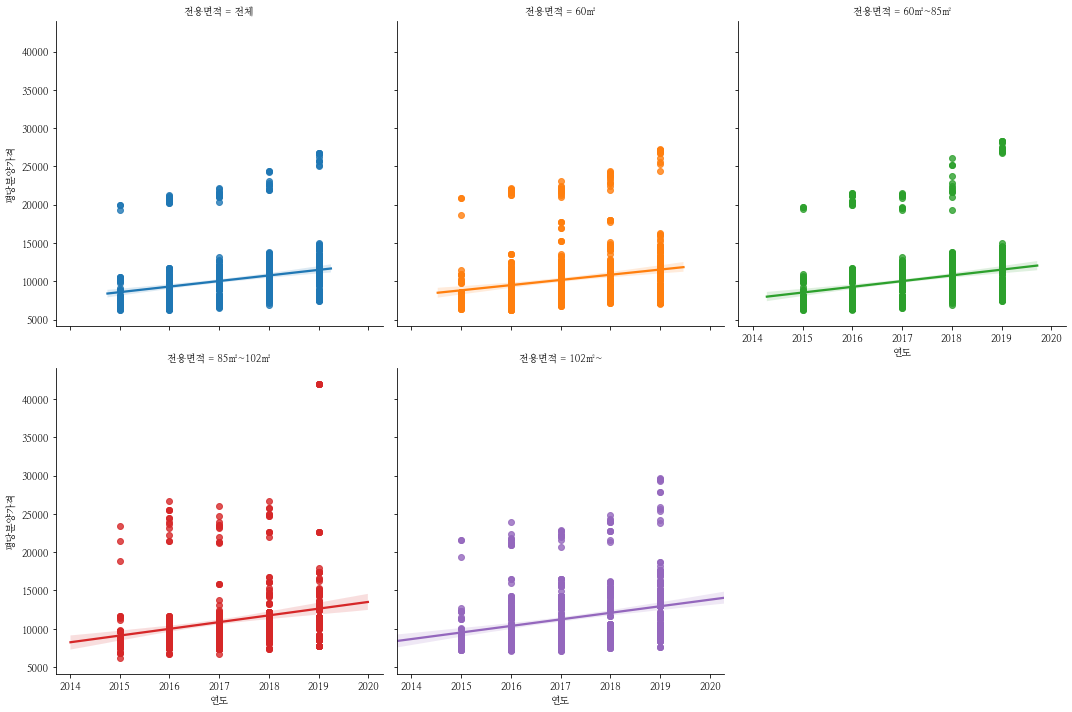

In [79]:
#regplot은 hue 옵션이 없으므로 lmplot으로 사용합니다. 
sns.lmplot(data=df_last,x="연도",y="평당분양가격", hue="전용면적" , col="전용면적", col_wrap=3 )

lmplot은 x축, y축 둘 다 수치데이터일때 그리는 것이 좋습니다. 데이터의 분포도르 알기 어렵다는 단점이 있습니다. 위에서 '연도'데이터는 수치형이라기 보다는 카테고리형 데이터에 가깝습니다. 이럴떄는 swarmplot이 적당합니다. 

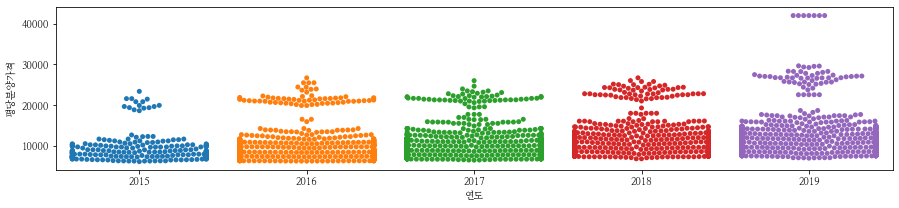

In [83]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last,x="연도",y="평당분양가격")

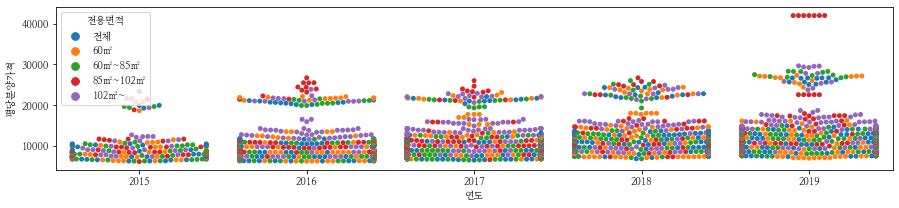

In [84]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last,x="연도",y="평당분양가격",hue="전용면적")

swramplot의 단점은 점을 일일히 찍기때문에 시간이 오래 걸립니다. 따라서, 너무 많은 데이터의 경우 swarmplot으로 그리는 것이 적당하지 않을 수 잇습니다. 시간이 오래 걸리기 때문이죠. 

### 이상치 보기

In [85]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [86]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [87]:
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

In [88]:
df_last.dtypes

지역명        object
연도          int64
월           int64
분양가격      float64
평당분양가격    float64
전용면적       object
dtype: object

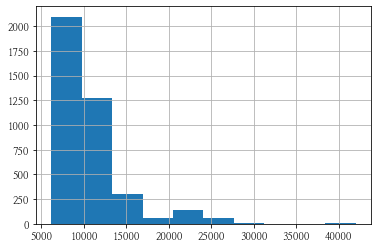

In [90]:
h =df_last["평당분양가격"].hist()

히스토그램은 막대를 통해서 빈도수를 확인할 수 있습니다. 

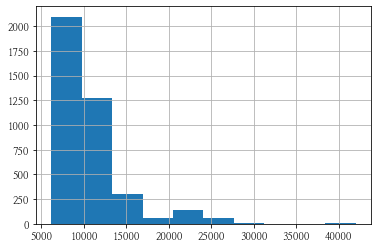

In [91]:
h = df_last["평당분양가격"].hist(bins=10)

bins=10을 주면 막대를 10개의 구간에 나눠서 담는다는 뜻입니다. 그리고 그 구간에 등장하는 빈도수를 셉니다. 

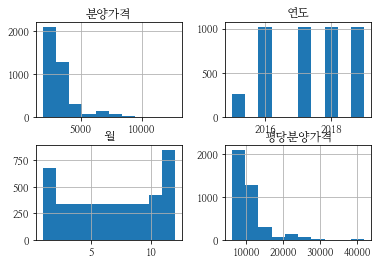

In [93]:
a = df_last.hist(bins=10)

In [96]:
price = df_last.loc[df_last["평당분양가격"].notnull(),"평당분양가격"]

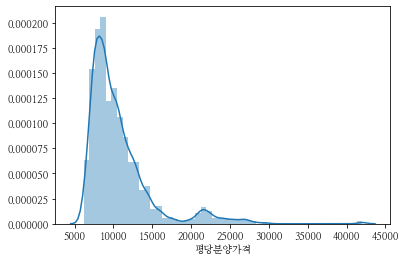

In [99]:
sns.distplot(price)

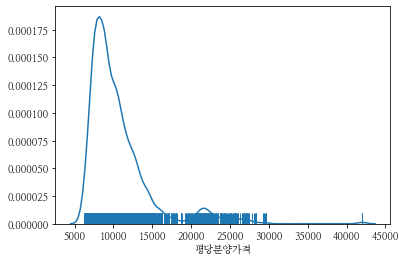

In [106]:
sns.distplot(price, hist=False, rug=True)

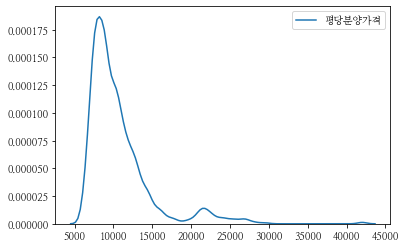

In [103]:
# sns.distplot(price, hist=False, rug=True)
sns.kdeplot(price)

참고:https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples 

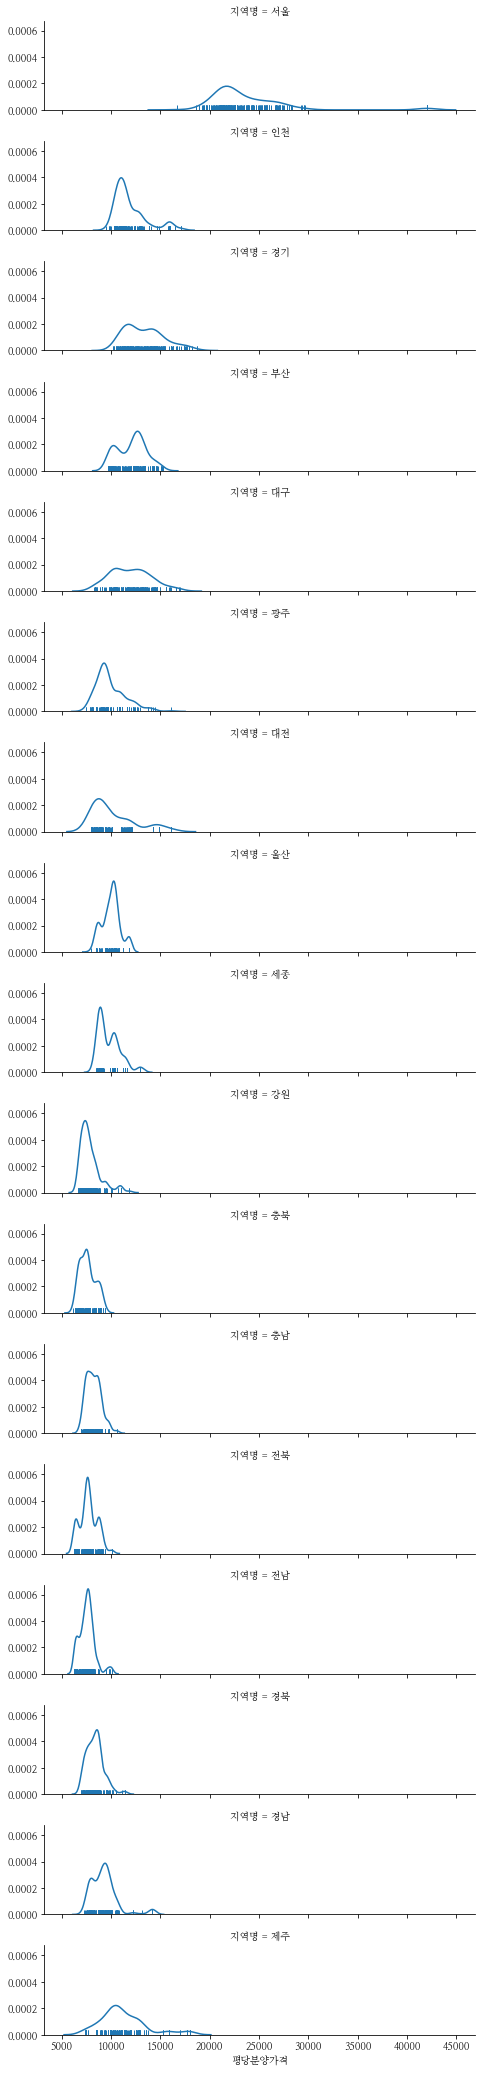

In [102]:
g = sns.FacetGrid(df_last, row="지역명", 
                  height=1.7, aspect=4,)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True);

분양 가격의 분포를 볼 수 있습니다.

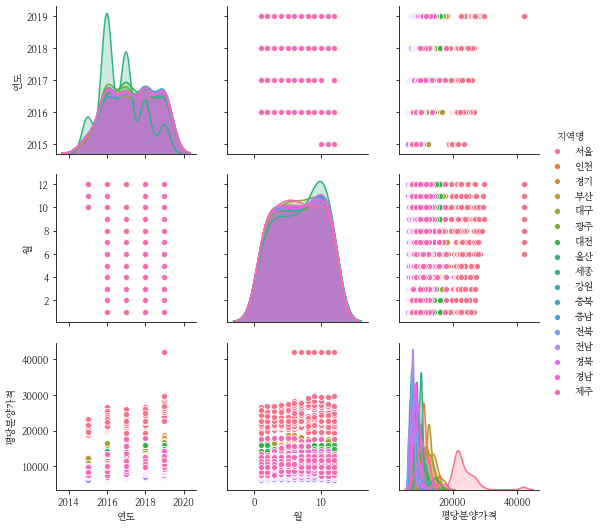

In [112]:
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), 
                          ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [113]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.
df_last["전용면적"].value_counts()

60㎡~85㎡     867
전체          867
60㎡         867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기